### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

2023-02-06 15:10:27,329	INFO worker.py:1528 -- Started a local Ray instance.


#### Train the network

In [2]:
n = 10
popsize = 20
name = 'centered2'
#device = torch.device('mps:0')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, popsize=popsize)

(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 153 (seed=4069942414, Mon Feb  6 15:10:28 2023)


In [3]:
trainer.train(1000, name)

         iter : 1
    mean_eval : -901.6920166015625
pop_best_eval : -133.58718872070312
  median_eval : -1156.375732421875
    best_eval : -133.58718872070312
   worst_eval : -1634.78466796875

         iter : 2
    mean_eval : -884.7195434570312
pop_best_eval : -10.145630836486816
  median_eval : -916.3985595703125
    best_eval : -10.145630836486816
   worst_eval : -1658.41015625

         iter : 3
    mean_eval : -868.3963012695312
pop_best_eval : -11.998493194580078
  median_eval : -781.9823608398438
    best_eval : -10.145630836486816
   worst_eval : -1658.41015625

         iter : 4
    mean_eval : -772.5676879882812
pop_best_eval : -308.7012939453125
  median_eval : -732.724365234375
    best_eval : -10.145630836486816
   worst_eval : -1658.41015625

         iter : 5
    mean_eval : -747.6507568359375
pop_best_eval : -56.038047790527344
  median_eval : -614.38916015625
    best_eval : -10.145630836486816
   worst_eval : -1884.3955078125

         iter : 6
    mean_eval : -513.

In [ ]:
network = trainer.problem.parameterize_net(trainer.searcher.status['center'])

In [ ]:
network = trainer.get_trained_network()

#### Visualize trained network

In [ ]:
organism = generate_organism(10, device)
graph = organism.toGraph()
visualizer = Visualizer()

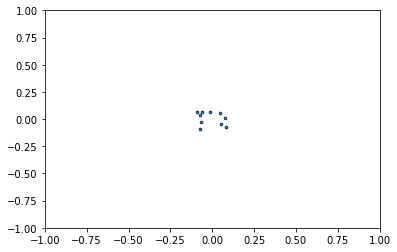

In [ ]:
anim = visualizer.animate_organism(graph, network, frames=100)
IPython.display.HTML(anim.to_jshtml())

In [ ]:
#anim.save('../animation/centered2.gif', writer='imagemagick', fps=10)
visualizer.save_animation_to_gif(anim, name, 10)

In [ ]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>